In [11]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd
import xgboost as xgb
from scipy.stats import norm

In [65]:
XGBoost_data = np.loadtxt('XGBoost_distances_xgboost.csv')
MLP_data = np.loadtxt('MLP_distances.csv')

In [66]:
#manual inspection
XGBoost_best = XGBoost_data.reshape((-1, 245, 245))[9]
MLP_best = MLP_data.reshape((-1, 245, 245))[1]

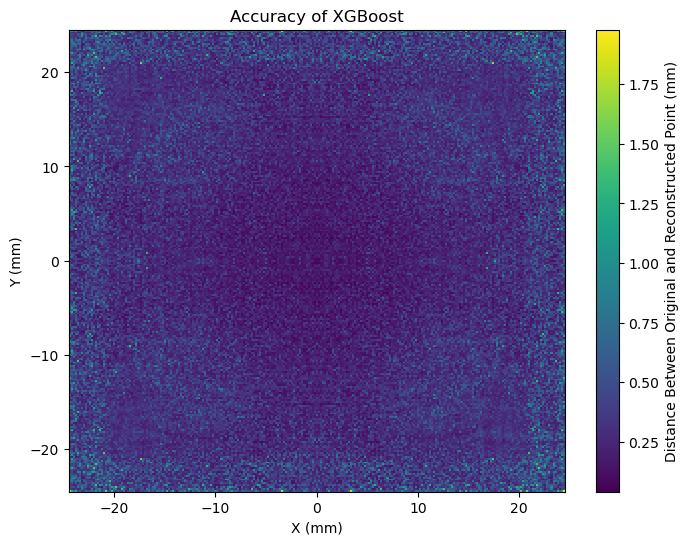

In [67]:
#XGBoost colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, XGBoost_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of XGBoost')

# Display the plot
plt.savefig("xgboost_accuracy.png")

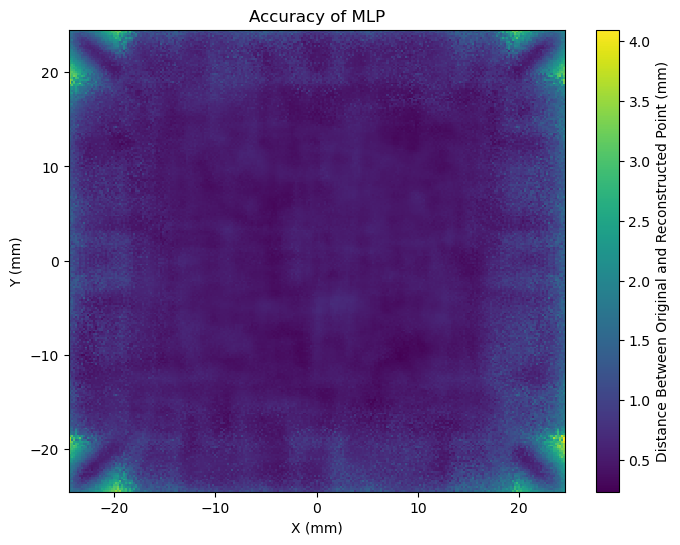

In [68]:
#MLP colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, MLP_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of MLP')

# Display the plot
plt.savefig("MLP_accuracy.png")

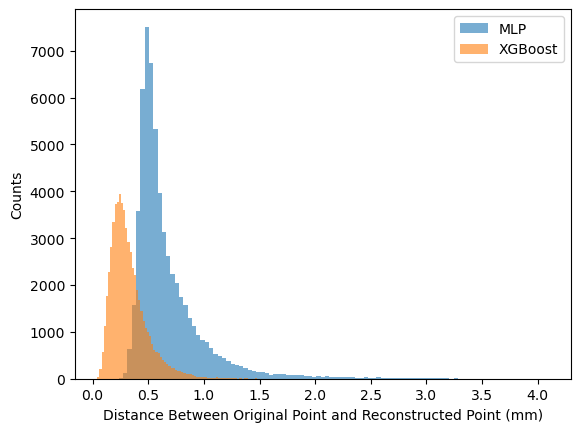

In [69]:
#histogram comparing both methods
plt.hist(MLP_best.ravel(), bins=100, alpha=0.6, label='MLP')
plt.hist(XGBoost_best.ravel(), bins=100, alpha=0.6, label='XGBoost')
plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.savefig("comparison_histogram.png")

In [71]:
#averages
for i in range(15):
    print("Average XGBoost Distance (mm): " + str(np.average(XGBoost_data[i])))
    print("Average MLP Distance (mm): " + str(np.average(MLP_data[i])))

Average XGBoost Distance (mm): 0.35784425787180374
Average MLP Distance (mm): 0.6248935877578864
Average XGBoost Distance (mm): 0.33355684878606984
Average MLP Distance (mm): 0.680779398166009
Average XGBoost Distance (mm): 0.3313804850531561
Average MLP Distance (mm): 0.6551748180960767
Average XGBoost Distance (mm): 0.339274256028592
Average MLP Distance (mm): 0.6557798788910761
Average XGBoost Distance (mm): 0.34482544537756205
Average MLP Distance (mm): 0.6817774494755404
Average XGBoost Distance (mm): 0.3514628639063121
Average MLP Distance (mm): 0.7307972344736717
Average XGBoost Distance (mm): 0.3441136502603499
Average MLP Distance (mm): 0.709764718356719
Average XGBoost Distance (mm): 0.34076624184772797
Average MLP Distance (mm): 0.7059843522081619
Average XGBoost Distance (mm): 0.334933851726517
Average MLP Distance (mm): 0.6361728155257914
Average XGBoost Distance (mm): 0.32635259936305416
Average MLP Distance (mm): 0.6839690687504146
Average XGBoost Distance (mm): 0.336343

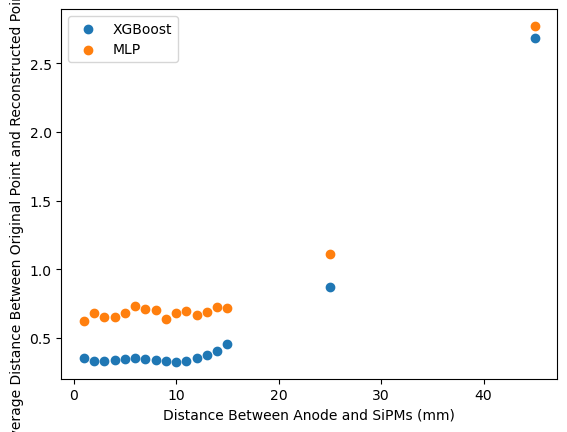

In [64]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 45]
XGBoosty = []
MLPy = []
for i in range(len(x)):
    XGBoosty.append(np.average(XGBoost_data[i]))
    MLPy.append(np.average(MLP_data[i]))

plt.xlabel('Distance Between Anode and SiPMs (mm)')
plt.ylabel('Average Distance Between Original Point and Reconstructed Point (mm)')
plt.scatter(x, XGBoosty, label='XGBoost')
plt.scatter(x, MLPy, label='MLP')
plt.legend(loc='upper left')
plt.savefig("comparison_scatter.png")

[[0.95307298 0.78492789]]


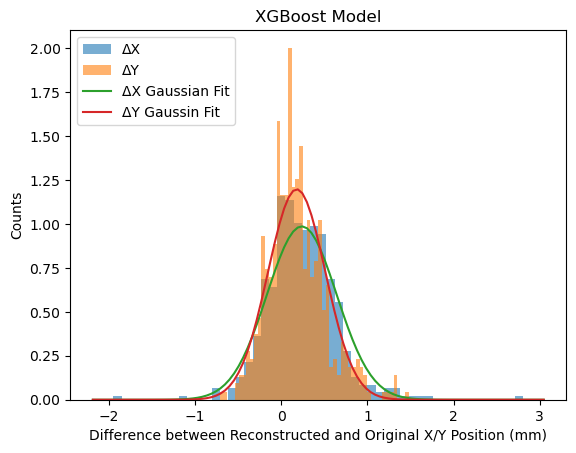

In [47]:
XGBoost_delta_data = np.loadtxt('XGBoost_distances_delta.csv')
XGBoost_delta_data = XGBoost_delta_data.reshape((17, 245, 245, 2))
element = XGBoost_delta_data[9]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:][:][0].ravel())
meany,stdy=norm.fit(element[:][:][1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:][:][0].ravel(), bins=50, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:][:][1].ravel(), bins=50, alpha=0.6, label='ΔY', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
xy = norm.pdf(x, meanx, stdx)
yy = norm.pdf(x, meany, stdy)
plt.plot(x, xy, label='ΔX Gaussian Fit')
plt.plot(x, yy, label='ΔY Gaussin Fit')
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('XGBoost Model')
plt.savefig("XGBoost_resolution.png")
print(np.array(standard_deviations)*2.355)

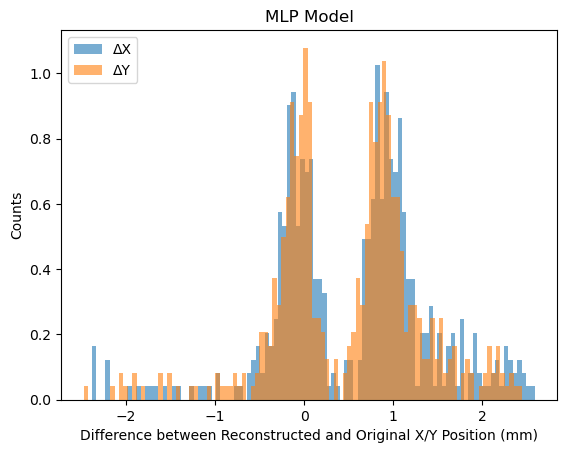

In [73]:
MLP_delta_data = np.loadtxt('MLP_distances_delta.csv')
MLP_delta_data = MLP_delta_data.reshape((15, 245, 245, 2))
element = MLP_delta_data[0]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:][:][0].ravel())
meany,stdy=norm.fit(element[:][:][1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:][:][0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:][:][1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('MLP Model')
plt.savefig("MLP_resolution.png")

[[0.36013345 0.32371546]]


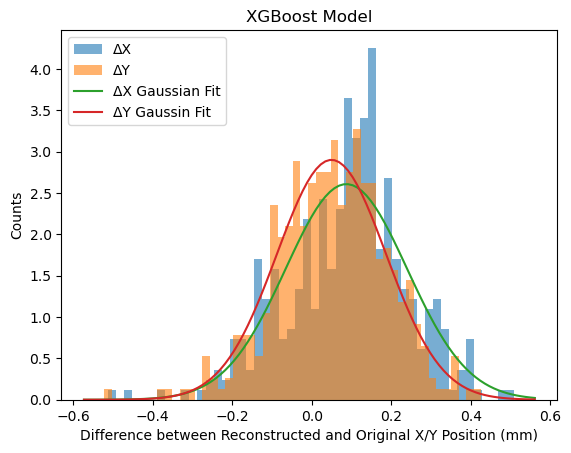

In [46]:
XGBoost_data_cut = np.loadtxt('XGBoost_distances_delta_cut.csv')
XGBoost_data_cut = XGBoost_data_cut.reshape((17, 201, 201, 2))
element = XGBoost_data_cut[6]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:][:][0].ravel())
meany,stdy=norm.fit(element[:][:][1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:][:][0].ravel(), bins=50, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:][:][1].ravel(), bins=50, alpha=0.6, label='ΔY', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
xy = norm.pdf(x, meanx, stdx)
yy = norm.pdf(x, meany, stdy)
plt.plot(x, xy, label='ΔX Gaussian Fit')
plt.plot(x, yy, label='ΔY Gaussin Fit')
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('XGBoost Model')
plt.savefig("XGBoost_resolution_cut.png")
print(np.array(standard_deviations)*2.355)

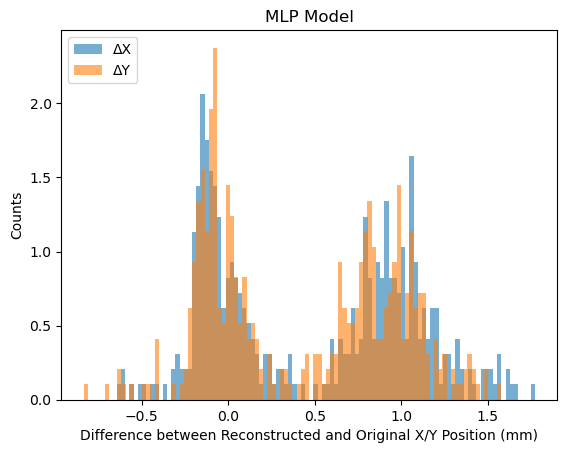

In [76]:
MLP_data_cut = np.loadtxt('MLP_distances_delta_cut.csv')
MLP_data_cut = MLP_data_cut.reshape((15, 245, 245, 2))
#had the wrong array size when putting data in so correcting it here
MLP_data_cut = MLP_data_cut[:,:201,:201,:]
element = MLP_data_cut[0]
standard_deviations = []
means = []
meanx,stdx=norm.fit(element[:][:][0].ravel())
meany,stdy=norm.fit(element[:][:][1].ravel())
standard_deviations.append([stdx, stdy])
means.append([meanx, meany])
plt.hist(element[:][:][0].ravel(), bins=100, alpha=0.6, label='ΔX', density=True)
plt.hist(element[:][:][1].ravel(), bins=100, alpha=0.6, label='ΔY', density=True)
plt.legend(loc='upper left')
plt.xlabel('Difference between Reconstructed and Original X/Y Position (mm)')
plt.ylabel('Counts')
plt.title('MLP Model')
plt.savefig("MLP_resolution_cut.png")

In [6]:
XGBoost_data_cut_distances = np.zeros((17, 201, 201))
for a in range(17):
    for b in range(201):
        for c in range(201):
            XGBoost_data_cut_distances[a][b][c] = math.dist(XGBoost_data_cut[a][b][c], [0,0])

for array in XGBoost_data_cut_distances:
    print(np.average(array))

0.1799009428616198
0.1851893317024007
0.1917721170057791
0.18584672749931574
0.18485227811009672
0.17695290434369698
0.17553525905527106
0.1776116684370935
0.18996393391807634
0.2026849414842559
0.2271903356136066
0.25172538154335344
0.27333126026899623
0.3002939566103934
0.3295818198673386
0.6730278489077612
1.6575427231877022


In [43]:
MLP_data_cut_distances = np.zeros((15, 201, 201))
for a in range(15):
    for b in range(201):
        for c in range(201):
            MLP_data_cut_distances[a][b][c] = math.dist(MLP_data_cut[a][b][c], [0,0])

for array in MLP_data_cut_distances:
    print(np.average(array))

0.26369089942802104
0.3147326991343626
0.3059515500307809
0.33442290071131525
0.4133577176551103
0.32406110306822095
0.4180500669171277
0.41280719616766387
0.32503157106331215
0.3458892915262298
0.43823209853785927
0.4135924901367748
0.4255646902159006
0.48375766934086445
0.46914880836698747


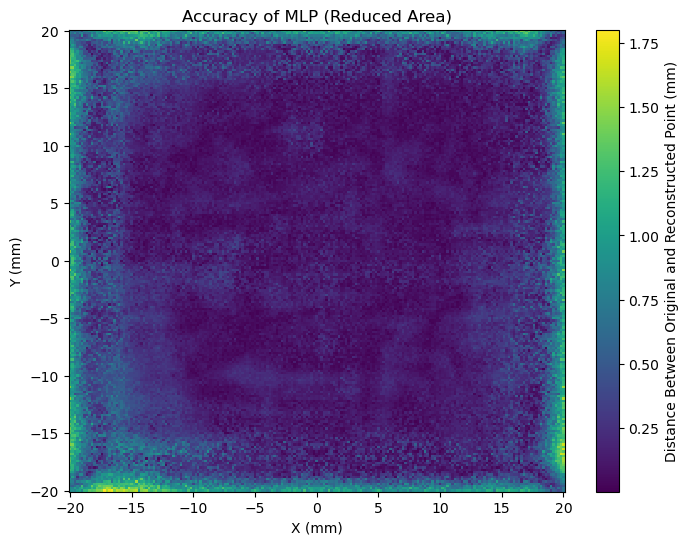

In [75]:
#MLP colormap
#creating colormap
xaxis_cut = 1000*np.linspace(-0.0200, 0.0200, 201)
yaxis_cut = 1000*np.linspace(-0.0200, 0.0200, 201)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis_cut, yaxis_cut, MLP_data_cut_distances[0], shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of MLP (Reduced Area)')

# Display the plot
plt.savefig("MLP_accuracy_cut.png")

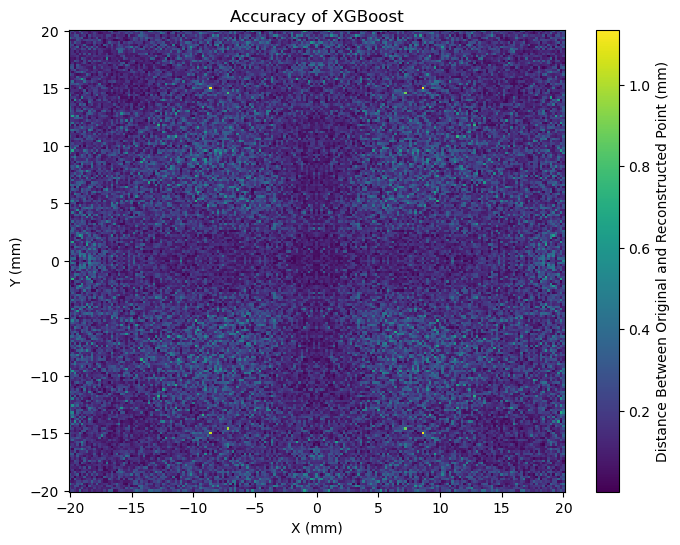

In [74]:
#XGBoost colormap
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis_cut, yaxis_cut, XGBoost_data_cut_distances[6], shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of XGBoost')

# Display the plot
plt.savefig("xgboost_accuracy_cut.png")